In [1]:
#Importing necessary packages
from pyspark.sql import SparkSession
from pyspark.sql.functions import split, col, substring, when, concat, lit
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Learning_Spark") \
    .getOrCreate()
import pandas as pd
import geopandas as gpd
import osmnx as ox
import contextily as cx
#Reading file, must change on new computer
data = gpd.read_file("/Users/hunter7lee/Downloads/Collisions.geojson")

22/07/13 16:26:18 WARN Utils: Your hostname, Hunters-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.65.12.84 instead (on interface en0)
22/07/13 16:26:18 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/07/13 16:26:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/07/13 16:26:20 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
data

OBJECTID  INCKEY  COLDETKEY REPORTNO     STATUS      ADDRTYPE  \
0              1  346124     347624  3889537    Matched         Block   
1              2   16800      16800  3465384    Matched         Block   
2              3  350067     351527  EC33543  Unmatched  Intersection   
3              4    1021       1021  3380605    Matched         Block   
4              5   84000      84000  2899026    Matched         Block   
...          ...     ...        ...      ...        ...           ...   
234615    234616  351019     352479  3893800  Unmatched  Intersection   
234616    234617  350752     352212  EC10234    Matched         Block   
234617    234618  351005     352465  3890775  Unmatched  Intersection   
234618    234619  351016     352476  3904033  Unmatched         Block   
234619    234620  350256     351716  3836057  Unmatched         Block   

         INTKEY                                           LOCATION  \
0           NaN   17TH NB AVE NE BETWEEN NE 47TH ST AND NE 50TH ST   
1           NaN  35TH AVE SW BETWEEN SW GRAHAM ST AND SW MORGAN ST   
2       29582.0                            1ST AVE AND VIRGINIA ST   
3           NaN  62ND AVE SW BETWEEN ALKI AVE SW AND SW STEVENS ST   
4           NaN      BROADWAY E BETWEEN E MERCER ST AND E ROY E ST   
...         ...                                                ...   
234615  35965.0                      MERIDIAN AVE N AND N 130TH ST   
234616      NaN   N 63RD ST BETWEEN PHINNEY AVE N AND DAYTON AVE N   
234617  30403.0                              12TH AVE AND E FIR ST   
234618      NaN      S MICHIGAN ST BETWEEN 4TH AVE S AND 5TH AVE S   
234619      NaN     AURORA AVE N BETWEEN N 141ST ST AND N 143RD ST   

       EXCEPTRSNCODE EXCEPTRSNDESC  ...                LIGHTCOND  \
0                             None  ...  Dark - No Street Lights   
1                             None  ...                 Daylight   
2                             None  ...                     None   
3                             None  ...                 Daylight   
4               None          None  ...                 Daylight   
...              ...           ...  ...                      ...   
234615                        None  ...                     None   
234616                        None  ...                 Daylight   
234617                        None  ...                     None   
234618                        None  ...                     None   
234619                        None  ...                     None   

       PEDROWNOTGRNT SDOTCOLNUM  SPEEDING  ST_COLCODE  \
0               None       None      None          50   
1               None       None      None          13   
2               None       None      None               
3               None       None      None          32   
4               None   08247023      None          14   
...              ...        ...       ...         ...   
234615          None       None      None               
234616          None       None      None          32   
234617          None       None      None               
234618          None       None      None               
234619          None       None      None               

                                               ST_COLDESC  SEGLANEKEY  \
0                                            Fixed object           0   
1       From same direction - both going straight - bo...           0   
2                                                    None           0   
3                                  One parked--one moving           0   
4       From same direction - both going straight - on...           0   
...                                                   ...         ...   
234615                                               None           0   
234616                             One parked--one moving           0   
234617                                               None           0   
234618                                               None 

In [3]:
#showing all the columns of the data
pd.set_option('display.max_columns', None)

In [4]:

data

OBJECTID  INCKEY  COLDETKEY REPORTNO     STATUS      ADDRTYPE  \
0              1  346124     347624  3889537    Matched         Block   
1              2   16800      16800  3465384    Matched         Block   
2              3  350067     351527  EC33543  Unmatched  Intersection   
3              4    1021       1021  3380605    Matched         Block   
4              5   84000      84000  2899026    Matched         Block   
...          ...     ...        ...      ...        ...           ...   
234615    234616  351019     352479  3893800  Unmatched  Intersection   
234616    234617  350752     352212  EC10234    Matched         Block   
234617    234618  351005     352465  3890775  Unmatched  Intersection   
234618    234619  351016     352476  3904033  Unmatched         Block   
234619    234620  350256     351716  3836057  Unmatched         Block   

         INTKEY                                           LOCATION  \
0           NaN   17TH NB AVE NE BETWEEN NE 47TH ST AND NE 50TH ST   
1           NaN  35TH AVE SW BETWEEN SW GRAHAM ST AND SW MORGAN ST   
2       29582.0                            1ST AVE AND VIRGINIA ST   
3           NaN  62ND AVE SW BETWEEN ALKI AVE SW AND SW STEVENS ST   
4           NaN      BROADWAY E BETWEEN E MERCER ST AND E ROY E ST   
...         ...                                                ...   
234615  35965.0                      MERIDIAN AVE N AND N 130TH ST   
234616      NaN   N 63RD ST BETWEEN PHINNEY AVE N AND DAYTON AVE N   
234617  30403.0                              12TH AVE AND E FIR ST   
234618      NaN      S MICHIGAN ST BETWEEN 4TH AVE S AND 5TH AVE S   
234619      NaN     AURORA AVE N BETWEEN N 141ST ST AND N 143RD ST   

       EXCEPTRSNCODE EXCEPTRSNDESC SEVERITYCODE  \
0                             None            1   
1                             None            2   
2                             None            2   
3                             None            1   
4               None          None            2   
...              ...           ...          ...   
234615                        None            2   
234616                        None            1   
234617                        None            1   
234618                        None            1   
234619                        None            1   

                          SEVERITYDESC COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  \
0       Property Damage Only Collision         Other            1         0   
1                     Injury Collision    Rear Ended            4         0   
2                     Injury Collision          None            2         0   
3       Property Damage Only Collision    Parked Car            2         0   
4                     Injury Collision    Rear Ended            3         0   
...                                ...           ...          ...       ...   
234615                Injury Collision          None            2         0   
234616  Property Damage Only Collision    Parked Car            2         0   
234617  Property Damage Only Collision          None            2         0   
234618  Property Damage Only Collision          None            2         0   
234619  Property Damage Only Collision          None            1         0   

        PEDCYLCOUNT  VEHCOUNT  INJURIES  SERIOUSINJURIES  FATALITIES  \
0                 0         1         0                0           0   
1                 0         3         3                0           0   
2                 0         0         1                0           0   
3                 0         2         0                0           0   
4                 0         2         1                0           0   
...             ...       ...       ...              ...         ...   
234615            0         0         1                0           0   
234616            0         2         0                0           0   
234617            0         0         0                0           0   
234618  

In [5]:
cats = data.dtypes

In [6]:
cats

OBJECTID                         int64
INCKEY                           int64
COLDETKEY                        int64
REPORTNO                        object
STATUS                          object
ADDRTYPE                        object
INTKEY                         float64
LOCATION                        object
EXCEPTRSNCODE                   object
EXCEPTRSNDESC                   object
SEVERITYCODE                    object
SEVERITYDESC                    object
COLLISIONTYPE                   object
PERSONCOUNT                      int64
PEDCOUNT                         int64
PEDCYLCOUNT                      int64
VEHCOUNT                         int64
INJURIES                         int64
SERIOUSINJURIES                  int64
FATALITIES                       int64
INCDATE            datetime64[ns, UTC]
INCDTTM                         object
JUNCTIONTYPE                    object
SDOT_COLCODE                    object
SDOT_COLDESC                    object
INATTENTIONIND           

In [7]:
#mapping the time of day to a string, and creating two new categories based on longitude and latitude
data["INCDTTM"] = data["INCDTTM"].map(str)
data['lon'] = data['geometry'].x
data['lat'] = data['geometry'].y

In [8]:
dataS = spark.createDataFrame(data)

In [9]:
#if you want only data with time of day apply this filter
dataS = dataS.filter(dataS.INCDTTM.rlike("M"))

In [10]:
dataS.count()


22/07/13 16:28:09 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
22/07/13 16:28:10 WARN TaskSetManager: Stage 0 contains a task of very large size (11011 KiB). The maximum recommended task size is 1000 KiB.


177504

In [11]:
#getting rid of useless/non-full columns
dataSFS = dataS.select("OBJECTID",  "ADDRTYPE", "LOCATION", "SEVERITYCODE", "COLLISIONTYPE", "PERSONCOUNT", \
                        "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT" , "INJURIES" , "SERIOUSINJURIES", "FATALITIES", \
                       "INCDTTM", "JUNCTIONTYPE", "SDOT_COLCODE", "SDOT_COLDESC" , "WEATHER", "ROADCOND", \
                       "LIGHTCOND", "geometry", "lon", "lat")

In [12]:
#simplifying columns
dataSFSC = dataSFS.withColumn("num_affected" , col("PERSONCOUNT")+col("PEDCOUNT")+col("PEDCYLCOUNT"))

In [13]:
#getting rid of simplified columns
dataSFSCD = dataSFSC.drop("PERSONCOUNT", "PEDCOUNT" , "PEDCYLCOUNT")

In [14]:
dataSFSCD.show()

22/07/13 16:28:14 WARN TaskSetManager: Stage 3 contains a task of very large size (11011 KiB). The maximum recommended task size is 1000 KiB.


22/07/13 16:28:18 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 3 (TID 9): Attempting to kill Python Worker
+--------+------------+--------------------+------------+-------------+--------+--------+---------------+----------+--------------------+--------------------+------------+--------------------+--------+--------+--------------------+--------------------+-------------------+------------------+------------+
|OBJECTID|    ADDRTYPE|            LOCATION|SEVERITYCODE|COLLISIONTYPE|VEHCOUNT|INJURIES|SERIOUSINJURIES|FATALITIES|             INCDTTM|        JUNCTIONTYPE|SDOT_COLCODE|        SDOT_COLDESC| WEATHER|ROADCOND|           LIGHTCOND|            geometry|                lon|               lat|num_affected|
+--------+------------+--------------------+------------+-------------+--------+--------+---------------+----------+--------------------+--------------------+------------+--------------------+--------+--------+--------------------+--------------------+----

In [15]:
#splitting up the INCDTTM column of the dataframe
splitDF = dataSFSCD.withColumn("date",split(col("INCDTTM")," ").getItem(0))\
.withColumn("time",split(col("INCDTTM")," ").getItem(1)).withColumn("AMPM",split(col("INCDTTM")," ").getItem(2))

In [16]:
#fixing AM and PM to run on 24 hour time
splitDF1 = splitDF.withColumn("adj", \
   when((splitDF.AMPM == "AM"), 0) \
     .when((splitDF.AMPM == "PM"), 12) \
     .otherwise(0) \
  )

In [17]:
splitDF1.show()

22/07/13 16:28:18 WARN TaskSetManager: Stage 4 contains a task of very large size (11011 KiB). The maximum recommended task size is 1000 KiB.


22/07/13 16:28:22 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 4 (TID 10): Attempting to kill Python Worker
+--------+------------+--------------------+------------+-------------+--------+--------+---------------+----------+--------------------+--------------------+------------+--------------------+--------+--------+--------------------+--------------------+-------------------+------------------+------------+----------+--------+----+---+
|OBJECTID|    ADDRTYPE|            LOCATION|SEVERITYCODE|COLLISIONTYPE|VEHCOUNT|INJURIES|SERIOUSINJURIES|FATALITIES|             INCDTTM|        JUNCTIONTYPE|SDOT_COLCODE|        SDOT_COLDESC| WEATHER|ROADCOND|           LIGHTCOND|            geometry|                lon|               lat|num_affected|      date|    time|AMPM|adj|
+--------+------------+--------------------+------------+-------------+--------+--------+---------------+----------+--------------------+--------------------+------------+--------------------+-----

In [18]:
splitDF2 = splitDF1.withColumn("t1",split(col("time"),":").getItem(0))\
.withColumn("t2",split(col("time"),":").getItem(1)).withColumn("t3",split(col("time"),":").getItem(2))\
.withColumn("year", split(col("date"), "/").getItem(2))

In [19]:
splitDF3 = splitDF2.withColumn("t0", (col("t1").cast("int") + col("adj")).cast("string"))

In [20]:

splitDF4 = splitDF3.withColumn("time24",concat(col("t0"),lit(':'),\
    col("t2"),lit(':'),col("t3")))
    

In [21]:
splitDF4.show()

22/07/13 16:28:23 WARN TaskSetManager: Stage 5 contains a task of very large size (11011 KiB). The maximum recommended task size is 1000 KiB.


22/07/13 16:28:27 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 5 (TID 11): Attempting to kill Python Worker
+--------+------------+--------------------+------------+-------------+--------+--------+---------------+----------+--------------------+--------------------+------------+--------------------+--------+--------+--------------------+--------------------+-------------------+------------------+------------+----------+--------+----+---+---+---+---+----+---+--------+
|OBJECTID|    ADDRTYPE|            LOCATION|SEVERITYCODE|COLLISIONTYPE|VEHCOUNT|INJURIES|SERIOUSINJURIES|FATALITIES|             INCDTTM|        JUNCTIONTYPE|SDOT_COLCODE|        SDOT_COLDESC| WEATHER|ROADCOND|           LIGHTCOND|            geometry|                lon|               lat|num_affected|      date|    time|AMPM|adj| t1| t2| t3|year| t0|  time24|
+--------+------------+--------------------+------------+-------------+--------+--------+---------------+----------+--------------------+

In [22]:
df1 = splitDF4.drop("time", "AMPM" , "adj", "t1", "t2", "t3", "t0")

In [23]:
df1.count()


22/07/13 16:28:27 WARN TaskSetManager: Stage 6 contains a task of very large size (11011 KiB). The maximum recommended task size is 1000 KiB.


177504

In [24]:
from pyspark.sql.functions import isnan
df2 = df1.filter((isnan(df1.lon) == False) & (isnan(df1.lat) == False))

In [25]:
df2.show()

22/07/13 16:28:28 WARN TaskSetManager: Stage 9 contains a task of very large size (11011 KiB). The maximum recommended task size is 1000 KiB.


22/07/13 16:28:32 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 9 (TID 21): Attempting to kill Python Worker
+--------+------------+--------------------+------------+-------------+--------+--------+---------------+----------+--------------------+--------------------+------------+--------------------+--------+--------+--------------------+--------------------+-------------------+------------------+------------+----------+----+--------+
|OBJECTID|    ADDRTYPE|            LOCATION|SEVERITYCODE|COLLISIONTYPE|VEHCOUNT|INJURIES|SERIOUSINJURIES|FATALITIES|             INCDTTM|        JUNCTIONTYPE|SDOT_COLCODE|        SDOT_COLDESC| WEATHER|ROADCOND|           LIGHTCOND|            geometry|                lon|               lat|num_affected|      date|year|  time24|
+--------+------------+--------------------+------------+-------------+--------+--------+---------------+----------+--------------------+--------------------+------------+--------------------+--------+----

In [26]:
df = df2.toPandas()


22/07/13 16:28:32 WARN TaskSetManager: Stage 10 contains a task of very large size (11011 KiB). The maximum recommended task size is 1000 KiB.


In [27]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat))

In [28]:
#gdf.to_file("/Users/hunter7lee/Desktop/ISIS/SeattleData.geojson", driver='GeoJSON')

In [29]:
# df22 = df1.filter(df1.date.rlike("2022"))
# pdf22 = df22.toPandas()
# gdf22 = gpd.GeoDataFrame(
#     pdf22, geometry=gpd.points_from_xy(pdf22.lon, pdf22.lat))

# df21 = df1.filter(df1.date.rlike("2021"))
# pdf21 = df21.toPandas()
# gdf21 = gpd.GeoDataFrame(
#     pdf21, geometry=gpd.points_from_xy(pdf21.lon, pdf21.lat))

# df20 = df1.filter(df1.date.rlike("2020"))
# pdf20 = df20.toPandas()
# gdf20 = gpd.GeoDataFrame(
#     pdf20, geometry=gpd.points_from_xy(pdf20.lon, pdf20.lat))

# df19 = df1.filter(df1.date.rlike("2019"))
# pdf19 = df19.toPandas()
# gdf19 = gpd.GeoDataFrame(
#     pdf19, geometry=gpd.points_from_xy(pdf19.lon, pdf19.lat))

# df18 = df1.filter(df1.date.rlike("2018"))
# pdf18 = df18.toPandas()
# gdf18 = gpd.GeoDataFrame(
#     pdf18, geometry=gpd.points_from_xy(pdf18.lon, pdf18.lat))

# df17 = df1.filter(df1.date.rlike("2017"))
# pdf17 = df17.toPandas()
# gdf17 = gpd.GeoDataFrame(
#     pdf17, geometry=gpd.points_from_xy(pdf17.lon, pdf17.lat))

# df16 = df1.filter(df1.date.rlike("2016"))
# pdf16 = df16.toPandas()
# gdf16 = gpd.GeoDataFrame(
#     pdf16, geometry=gpd.points_from_xy(pdf16.lon, pdf16.lat))

In [30]:
df192021 = df2.filter(df2.date.rlike("2021") | df2.date.rlike("2020") | df2.date.rlike("2019"))

In [31]:
df192021p = df192021.toPandas()
gdf192021 = gpd.GeoDataFrame(
    df192021p, geometry=gpd.points_from_xy(df192021p.lon, df192021p.lat))
gdf192021
# gdf192021.to_file("/Users/hunter7lee/Desktop/ISIS/SeattleData192021.geojson", driver='GeoJSON')

22/07/13 16:28:47 WARN TaskSetManager: Stage 11 contains a task of very large size (11011 KiB). The maximum recommended task size is 1000 KiB.


OBJECTID      ADDRTYPE  \
0             1         Block   
1            12         Block   
2            15         Block   
3            22  Intersection   
4            23  Intersection   
...         ...           ...   
20192    234549  Intersection   
20193    234554         Block   
20194    234564         Block   
20195    234595         Block   
20196    234599  Intersection   

                                                LOCATION SEVERITYCODE  \
0       17TH NB AVE NE BETWEEN NE 47TH ST AND NE 50TH ST            1   
1          JOHN ST BETWEEN 7TH NB AVE N AND DEXTER AVE N            2   
2        6TH AVE W BETWEEN ELLIOTT AVE W AND W MERCER ST            2   
3                               14TH AVE S AND GOLF DR S           2b   
4                        ROOSEVELT WAY NE AND NE 80TH ST            2   
...                                                  ...          ...   
20192                                1ST AVE AND PINE ST            1   
20193  FRANKLIN AVE E BETWEEN E NEWTON ST AND E BOSTO...            1   
20194      ALASKAN WAY BETWEEN COLUMBIA ST AND MARION ST            2   
20195    NE 145TH ST BETWEEN 17TH AVE NE AND 19TH AVE NE            1   
20196                      MERIDIAN AVE N AND N 145TH ST            1   

      COLLISIONTYPE  VEHCOUNT  INJURIES  SERIOUSINJURIES  FATALITIES  \
0             Other         1         0                0           0   
1            Cycles         1         1                0           0   
2        Pedestrian         1         1                0           0   
3        Pedestrian         1         1                1           0   
4            Cycles         1         1                0           0   
...             ...       ...       ...              ...         ...   
20192    Parked Car         2         0                0           0   
20193         Other         1         0                0           0   
20194    Pedestrian         1         1                0           0   
20195     Left Turn         2         0                0           0   
20196    Rear Ended         2         0                0           0   

                      INCDTTM                             JUNCTIONTYPE  \
0       11/10/2021 6:13:00 AM  Mid-Block (not related to intersection)   
1        8/19/2021 6:59:00 AM  Mid-Block (not related to intersection)   
2        11/5/2021 7:15:00 AM  Mid-Block (not related to intersection)   
3        5/3/2020 12:52:00 AM   At Intersection (intersection related)   
4        8/26/2021 2:39:00 PM   At Intersection (intersection related)   
...                       ...                                      ...   
20192   11/29/2021 9:07:00 PM   At Intersection (intersection related)   
20193   10/21/2021 4:00:00 PM  Mid-Block (not related to intersection)   
20194   12/25/2021 6:25:00 PM  Mid-Block (not related to intersection)   
20195   12/20/2021 9:22:00 AM                        Driveway Junction   
20196  12/22/2021 10:00:00 AM   At Intersection (intersection related)   

      SDOT_COLCODE                                       SDOT_COLDESC  \
0               28      MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT   
1               14       MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END   
2               24                    MOTOR VEHCILE STRUCK PEDESTRIAN   
3               24                    MOTOR VEHCILE STRUCK PEDESTRIAN   
4               18  MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...   
...            ...                                                ...   
20192           14       MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END   
20193           28      MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT   
20194           24                    MOTOR VEHCILE STRUCK PEDESTRIAN   
20195           11  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...   
20196           14       MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END   

        WEATHER ROADCOND                LIGHTCOND  \
0      Overcast      Wet  Dark - No Street Lights

In [32]:
gdf192021.to_file("/Users/hunter7lee/Desktop/ISIS/SeattleData192021.geojson", driver='GeoJSON')

22/06/21 15:38:35 WARN TaskSetManager: Stage 15 contains a task of very large size (11543 KiB). The maximum recommended task size is 1000 KiB.


22/06/21 15:39:41 WARN TaskSetManager: Stage 17 contains a task of very large size (11543 KiB). The maximum recommended task size is 1000 KiB.


22/06/21 15:39:43 WARN TaskSetManager: Stage 18 contains a task of very large size (11543 KiB). The maximum recommended task size is 1000 KiB.


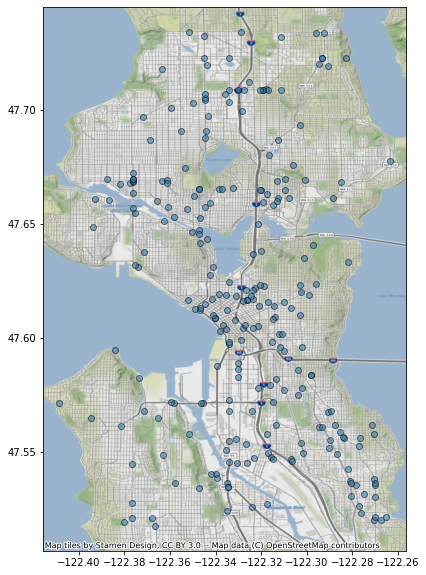

In [40]:

df_wm22 = gdf22.set_crs(crs='EPSG:4326')

ax22 = df_wm22.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax22, crs=df_wm22.crs.to_string())

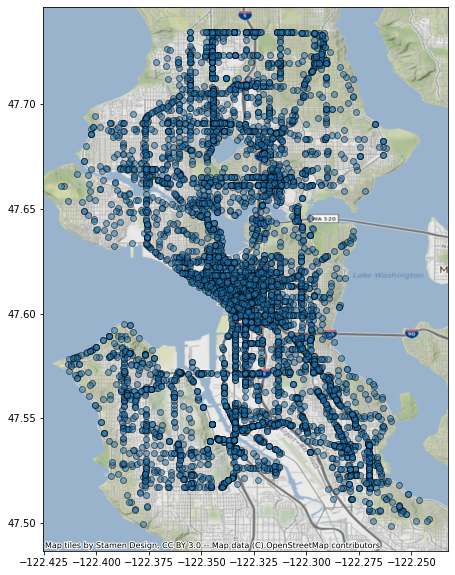

In [42]:
df_wm21 = gdf21.set_crs(crs='EPSG:4326')

ax21 = df_wm21.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax21, crs=df_wm21.crs.to_string())

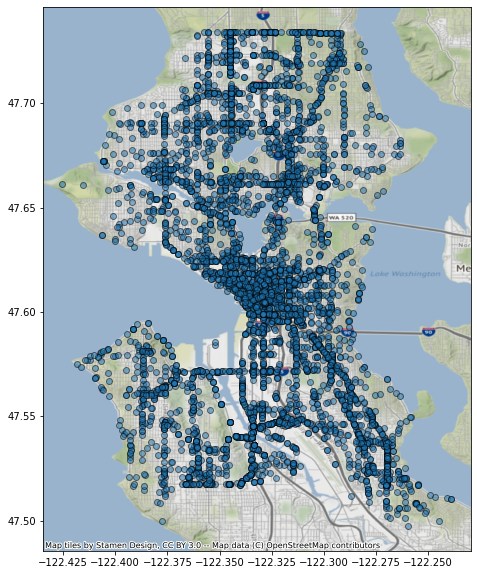

In [43]:
df_wm20 = gdf20.set_crs(crs='EPSG:4326')

ax20 = df_wm20.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax20, crs=df_wm20.crs.to_string())

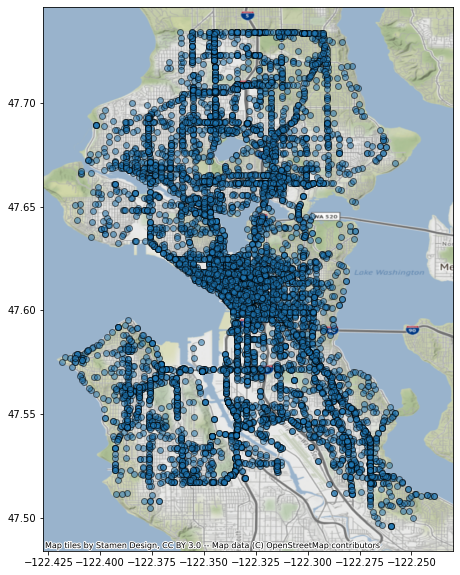

In [44]:
df_wm19 = gdf19.set_crs(crs='EPSG:4326')

ax19 = df_wm19.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax19, crs=df_wm19.crs.to_string())

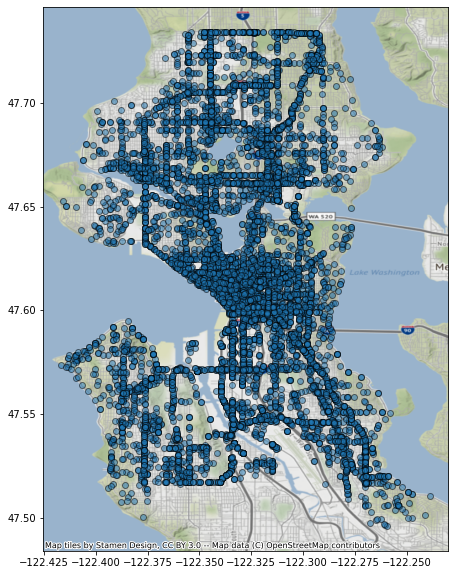

In [45]:
df_wm18 = gdf18.set_crs(crs='EPSG:4326')

ax18 = df_wm18.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax18, crs=df_wm18.crs.to_string())

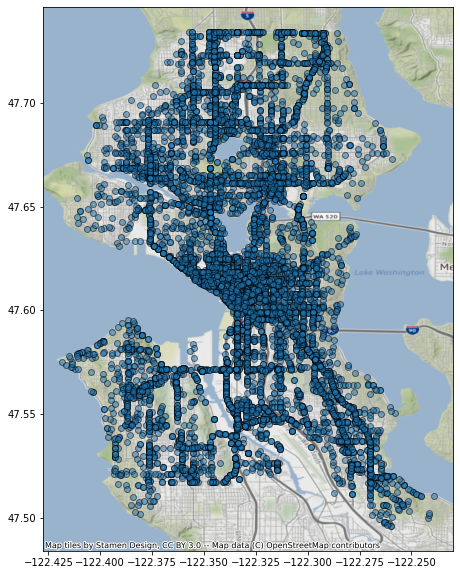

In [46]:
df_wm17 = gdf17.set_crs(crs='EPSG:4326')

ax17 = df_wm17.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax17, crs=df_wm17.crs.to_string())

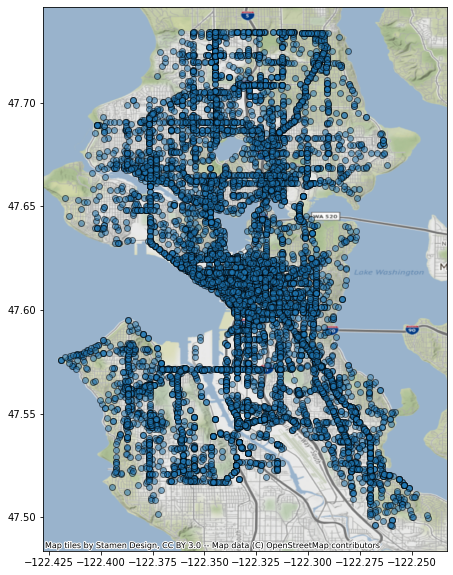

In [47]:
df_wm16 = gdf16.set_crs(crs='EPSG:4326')

ax16 = df_wm16.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax16, crs=df_wm16.crs.to_string())

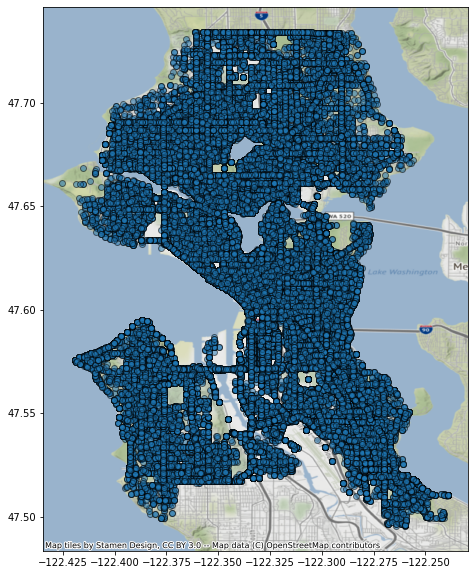

In [29]:
df_wm = gdf.set_crs(crs='EPSG:4326')

ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, crs=df_wm.crs.to_string())